In [ ]:
%pip install --upgrade --quiet langchain-groq
%pip install --upgrade --quiet  sentence_transformers
%pip install --upgrade --quiet  langchain-community
%pip install --upgrade --quiet marker-pdf
%pip install --upgrade --quiet unstructured > /dev/null
%pip install --upgrade --quiet qdrant-client
%pip install --upgrade --quiet langgraph
%pip install --quiet langchain_experimental


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.3/309.3 kB 17.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 5.27.2 which is incompatible.
google-ai-generativelanguage 0.6.6 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.27.2 which is incompatible.
google-cloud-aiplatform 1.59.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5

In [ ]:
import os
from langchain_groq import ChatGroq
from langchain_community.embeddings import SentenceTransformerEmbeddings
from langchain_community.document_loaders import UnstructuredMarkdownLoader
from langchain_experimental.text_splitter import SemanticChunker
from langchain.vectorstores import Qdrant
from langchain import PromptTemplate


In [ ]:
def get_llm():
    llm = ChatGroq(
        model="llama-3.1-70b-versatile",
        temperature=0,
        max_tokens=1024,
        top_p=1,
        stream=False,
        stop=None,
        api_key='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'
    )
    return llm

def get_embeddings():
    embeddings = SentenceTransformerEmbeddings(model_name="NeuML/pubmedbert-base-embeddings")

    return embeddings

#### Creating VectorDatabase

# **Convert single pdf**

In [ ]:
!marker_single '/content/medical_oncology_handbook_june_2020_edition.pdf' '/content/output ' --batch_multiplier 1 --max_pages 52 --langs English

2024-07-31 10:31:51.994136: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-31 10:31:51.994201: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-31 10:31:52.107513: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-31 10:31:52.154303: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-31 10:31:53.294826: W tensorflow/comp

# **Convert multiple files**

In [ ]:
# !marker /path/to/input/folder /path/to/output/folder --workers 10 --max 10 --metadata_file /path/to/metadata.json --min_length 10000

In [ ]:
embeddings = get_embeddings()

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/sett

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/6.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/667 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.30k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/706k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
markdown_path = "/content/output /medical_oncology_handbook_june_2020_edition/medical_oncology_handbook_june_2020_edition.md"
loader = UnstructuredMarkdownLoader(markdown_path)

data = loader.load()

In [ ]:
import re

text_splitter = SemanticChunker(embeddings,breakpoint_threshold_type="percentile")

# Ensure all elements in 'data' are strings
docs = text_splitter.create_documents([str(item) for item in data])

In [ ]:
print(docs[3].page_content)

To update systemic therapy scripts. Principles Of Management Of Patients On Systemic Therapy

Assessing Fitness For Systemic Therapy

Fitness for systemic therapy depends on many factors: - performance status, - the type and severity of side effects from previous cycles or doses, - blood parameters, - co-morbidities and - Patient choice If cure is the aim, it is usual to accept mild-to-moderate, non-life-threatening toxicities and continue treatment without delaying or reducing the dosage to minimise side effects. Sometimes it is prudent to use supportive therapy such as G-CSF to maintain dose intensity. However, in patients with incurable metastatic disease where quality of life is paramount, dose delays or dose reductions are necessary. Performance Status

This is graded using the Eastern Cooperative Oncology Group (ECOG) scale. Grade ECOG performance status 0 Fully active, able to carry on all pre-disease performance without  restriction. 1 Restricted in physically strenuous activit

In [ ]:
qdrant = Qdrant.from_documents(
    docs,
    embeddings,
    location=":memory:",  # Local mode with in-memory storage only
    collection_name="my_documents",
)

print("Vector DB Successfully Created!")

Vector DB Successfully Created!


In [ ]:
query = "What is Metastatic disease?"

docs = qdrant.similarity_search_with_score(query=query, k=2)
for i in docs:
    doc, score = i
    print({"score": score, "content": doc.page_content, "metadata": doc.metadata})

{'score': 0.414057013847829, 'content': 'In chemotherapy-sensitive malignancies like small –cell lung cancer, germ cell tumour or lymphoma, systemic chemotherapy is usually the treatment. In most other tumours, including non-small cell lung cancer, Radiotherapy is the preferred treatment. Endovascular stenting could achieve rapid relief of symptoms. Hypercalcemia: - Saline hydration, IV zelodronic acid, IV frusemide after adequate hydration. Steroids useful in hypercalcaemia due to lymphoma. s/c calcitonin may be useful in resistant hypercalcemia. Infusion reactions and other acute reactions - Mild to moderate infusion reactions with no features of anaphylaxis- - IV hydrocortisone and phenergan. Stop infusion till reaction subsides and restart at a lower rate, with close monitoring. Severe infusion reactions and anaphylaxis (hypotension, angioedema, bronchospasm, generalised urticaria) - Resuscitation with epinephrine, hydrocortisone, phenergan ranitidine and fluids. DO NOT RE-CHALLENG

In [ ]:
retriever = qdrant.as_retriever()

In [ ]:
from typing_extensions import TypedDict


class AgentState(TypedDict):
    question: str
    grades: list[str]
    llm_output: str
    documents: list[str]
    on_topic: bool

In [ ]:
def retrieve_docs(state: AgentState):
    question = state["question"]
    documents = retriever.get_relevant_documents(query=question)
    print("RETRIEVED DOCUMENTS:", documents)
    state["documents"] = [doc.page_content for doc in documents]
    return state

In [ ]:
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_core.prompts import ChatPromptTemplate


class GradeQuestion(BaseModel):
    """Boolean value to check whether a question is releated to the medical oncology"""

    score: str = Field(
        description="Question is about medical oncology ? If yes -> 'Yes' if not -> 'No'"
    )


def question_classifier(state: AgentState):
    question = state["question"]

    system = """You are a grader assessing the topic of a user question. \n
        Only answer if the question is about one of the following topics related to medical oncology:
        1. Treatment options for various types of cancer.
        2. Side effects and management of chemotherapy, radiation therapy, and immunotherapy.
        3. Advances and research in oncology treatments.
        4. Information about specific cancer diagnoses and prognoses.

        Examples: What are the side effects of chemotherapy? -> Yes
                  How will the weather be today? -> No
                  What are the latest treatments for breast cancer? -> Yes

        If the question IS about these topics respond with "Yes", otherwise respond with "No".
        """

    grade_prompt = ChatPromptTemplate.from_messages(
        [
            ("system", system),
            ("human", "User question: {question}"),
        ]
    )

    llm = get_llm()
    structured_llm = llm.with_structured_output(GradeQuestion)
    grader_llm = grade_prompt | structured_llm
    result = grader_llm.invoke({"question": question})
    print(f"QUESTION and GRADE: {question} - {result.score}")
    state["on_topic"] = result.score
    return state

In [ ]:
def on_topic_router(state: AgentState):
    on_topic = state["on_topic"]
    if on_topic.lower() == "yes":
        return "on_topic"
    return "off_topic"

In [ ]:
def off_topic_response(state: AgentState):
    state["llm_output"] = "I cant respond to that!"
    return state

In [ ]:
class GradeDocuments(BaseModel):
    """Boolean values to check for relevance on retrieved documents."""

    score: str = Field(
        description="Documents are relevant to the question, 'Yes' or 'No'"
    )


def document_grader(state: AgentState):
    docs = state["documents"]
    question = state["question"]

    system = """You are a grader assessing relevance of a retrieved document to a user question. \n
        If the document contains keyword(s) or semantic meaning related to the question, grade it as relevant. \n
        Give a binary score 'Yes' or 'No' score to indicate whether the document is relevant to the question."""

    grade_prompt = ChatPromptTemplate.from_messages(
        [
            ("system", system),
            (
                "human",
                "Retrieved document: \n\n {document} \n\n User question: {question}",
            ),
        ]
    )

    llm = get_llm()
    structured_llm = llm.with_structured_output(GradeDocuments)
    grader_llm = grade_prompt | structured_llm
    scores = []
    for doc in docs:
        result = grader_llm.invoke({"document": doc, "question": question})
        scores.append(result.score)
    state["grades"] = scores
    return state

In [ ]:
def gen_router(state: AgentState):
    grades = state["grades"]
    print("DOCUMENT GRADES:", grades)

    if any(grade.lower() == "yes" for grade in grades):
        filtered_grades = [grade for grade in grades if grade.lower() == "yes"]
        print("FILTERED DOCUMENT GRADES:", filtered_grades)
        return "generate"
    else:
        return "rewrite_query"

In [ ]:
from langchain_core.output_parsers import StrOutputParser


def rewriter(state: AgentState):
    question = state["question"]
    system = """You a question re-writer that converts an input question to a better version that is optimized \n
        for retrieval. Look at the input and try to reason about the underlying semantic intent / meaning."""
    re_write_prompt = ChatPromptTemplate.from_messages(
        [
            ("system", system),
            (
                "human",
                "Here is the initial question: \n\n {question} \n Formulate an improved question.",
            ),
        ]
    )
    llm = get_llm()
    question_rewriter = re_write_prompt | llm | StrOutputParser()
    output = question_rewriter.invoke({"question": question})
    state["question"] = output
    return state

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser


def generate_answer(state: AgentState):
    llm = get_llm()
    question = state["question"]
    context = state["documents"]

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """

    prompt = ChatPromptTemplate.from_template(
        template=template,
    )
    chain = prompt | llm | StrOutputParser()
    result = chain.invoke({"question": question, "context": context})
    state["llm_output"] = result
    return state

In [ ]:
from langgraph.graph import StateGraph, END

workflow = StateGraph(AgentState)

workflow.add_node("topic_decision", question_classifier)
workflow.add_node("off_topic_response", off_topic_response)
workflow.add_node("retrieve_docs", retrieve_docs)
workflow.add_node("rewrite_query", rewriter)
workflow.add_node("generate_answer", generate_answer)
workflow.add_node("document_grader", document_grader)

workflow.add_edge("off_topic_response", END)
workflow.add_edge("retrieve_docs", "document_grader")
workflow.add_conditional_edges(
    "topic_decision",
    on_topic_router,
    {
        "on_topic": "retrieve_docs",
        "off_topic": "off_topic_response",
    },
)
workflow.add_conditional_edges(
    "document_grader",
    gen_router,
    {
        "generate": "generate_answer",
        "rewrite_query": "rewrite_query",
    },
)
workflow.add_edge("rewrite_query", "retrieve_docs")
workflow.add_edge("generate_answer", END)


workflow.set_entry_point("topic_decision")

app = workflow.compile()

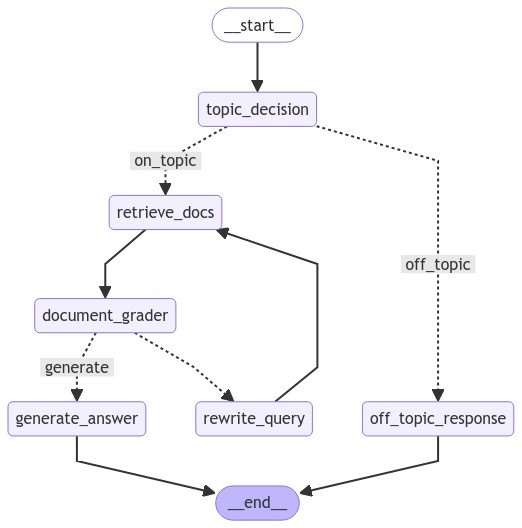

In [ ]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph(xray=True).draw_mermaid_png()))
except:
    pass

In [ ]:
result = app.invoke({"question": "What is Neutropenic Fever"})
result["llm_output"]

QUESTION and GRADE: What is Neutropenic Fever - Yes
RETRIEVED DOCUMENTS: [Document(metadata={'_id': '6f9dfadff98b4570b9a2468d7057b3df', '_collection_name': 'my_documents'}, page_content='difficile infection. Persistent neutropenic fever on D5 - add antifungal therapy (Amphotericin B 0.5mg/kg/day or Fluconazole 400mg/day). Discuss with consultants first. Duration Of Antibiotics (Variable)\n\nLow risk patient (clinically well, stable signs, no mucositis, ANC >100/µL, rising ANC, afebrile within 2-3 days of starting antibiotics, negative cultures) consider early discharge on oral Ciprofloxacin and Augmentin for 5 days or cease antibiotics altogether when ANC >500/µL. High risk patients, who become afebrile within 3 days, should continue parenteral antibiotics, targeted to the specific pathogen, until resolution of neutropenia. Specific pathogens need to be treated according to therapeutic guidelines while continuing broad coverage. Patients with any of the following characteristics are co

'Neutropenic Fever is a medical emergency characterized by a temperature ≥ 38°C on two occasions over 1 hour, or a single oral temperature of 38.3°C, with an Absolute Neutrophil Count (ANC) ≤ 500 or less, or ≤ 1000/µl with a predicted rapid decline to less than 500/µl.'